In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

C:\Users\fnafisa\AppData\Local\Temp\ipykernel_33132\1211678308.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


### Here we load the data as pandas dataframe, but what we also need since it is a time series case is to make the DATE column to be the index, and then change to be PriodIndex using .to_period() because we want to represent the time series as a sequence of quantity accumelated over periods of time.

In [17]:
iron_prices= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\iron ore\PIORECRUSDM.csv', parse_dates=["DATE"]).set_index('DATE').to_period()
iron_prices.tail()

,PIORECRUSDM
DATE,
2022-04,146.666667
2022-05,131.090909
2022-06,131.045455
2022-07,109.047619
2022-08,109.065217


In [18]:
iron_prices['TIME']= np.arange(len(iron_prices.index))

In [19]:
iron_prices

,PIORECRUSDM,TIME
DATE,,
1990-01,14.050000,0
1990-02,14.050000,1
1990-03,14.050000,2
1990-04,14.050000,3
1990-05,14.050000,4
...,...,...
2022-04,146.666667,387
2022-05,131.090909,388
2022-06,131.045455,389


In [32]:
#split data train/test
train_portion= int(len(iron_prices.index) * .8)

trainset= iron_prices.iloc[:(train_portion+1),]
testset= iron_prices.iloc[(train_portion+1):,]
len(trainset)+len(testset) == len(iron_prices)


True

In [38]:
# define the target and features
X_train= trainset.loc[:,['TIME']]
y_train= trainset.loc[:,['PIORECRUSDM']]

X_test= testset.loc[:,['TIME']]
y_test= testset.loc[:,['PIORECRUSDM']]

In [49]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
prediction= model.predict(X_test)#.T.flatten()


In [84]:
err= mean_absolute_error(y_test, prediction)

In [87]:
prediction= pd.DataFrame(prediction)

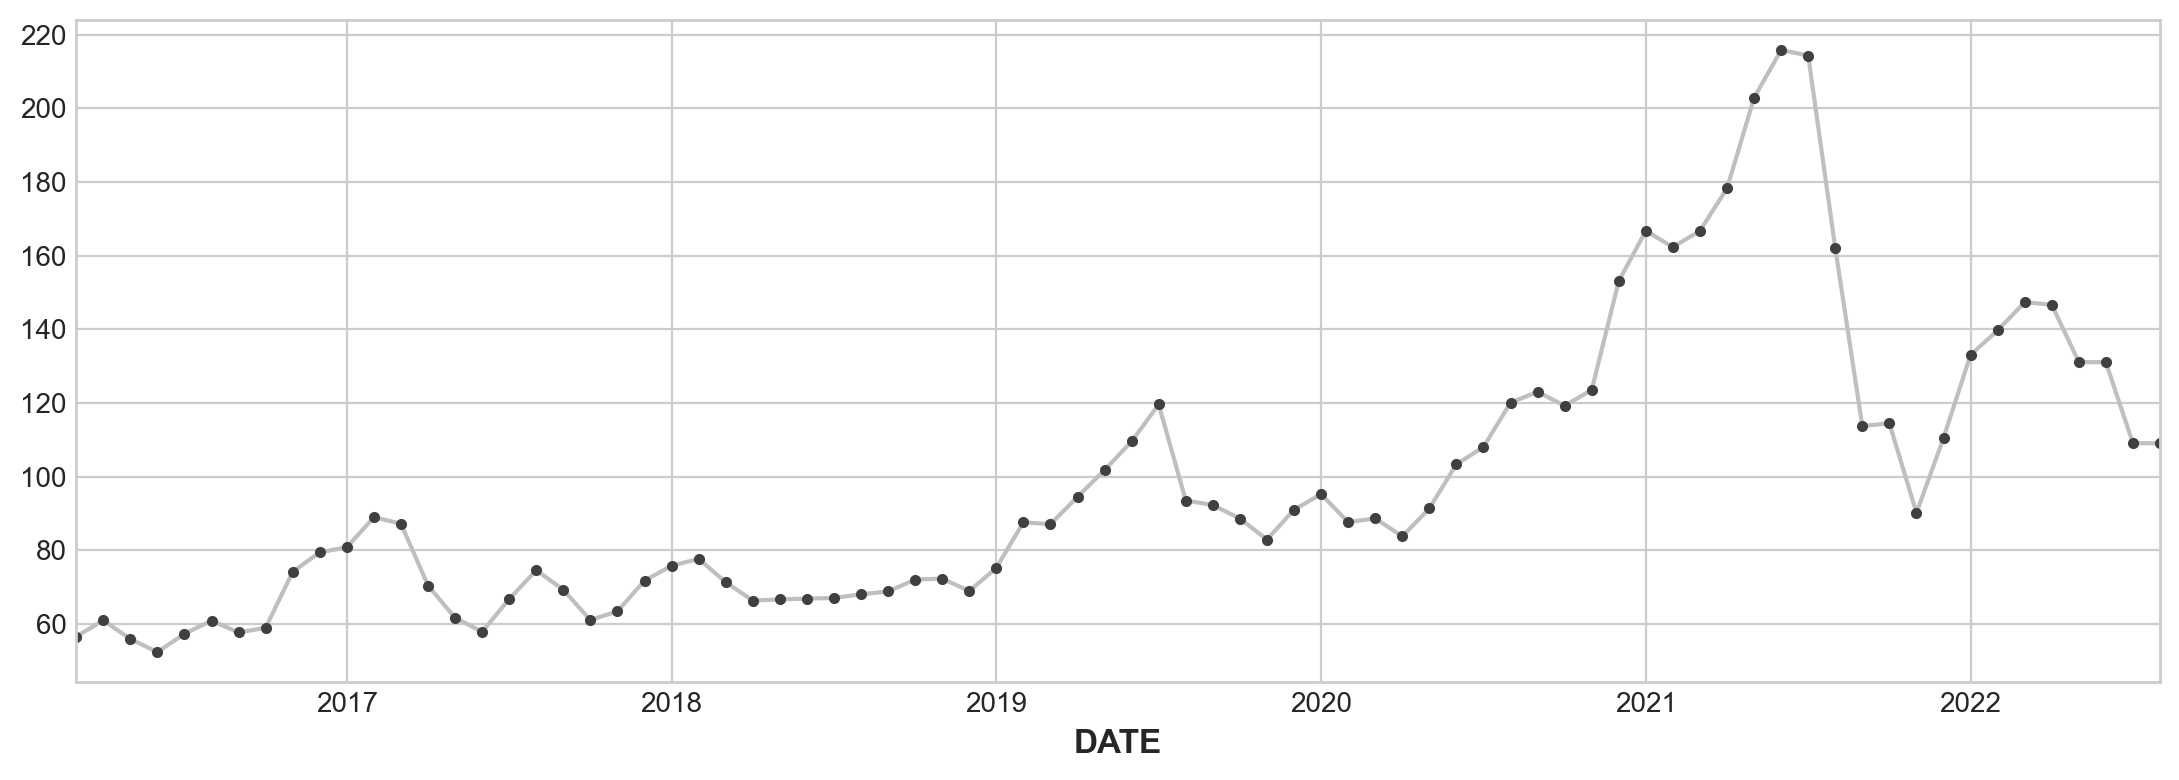

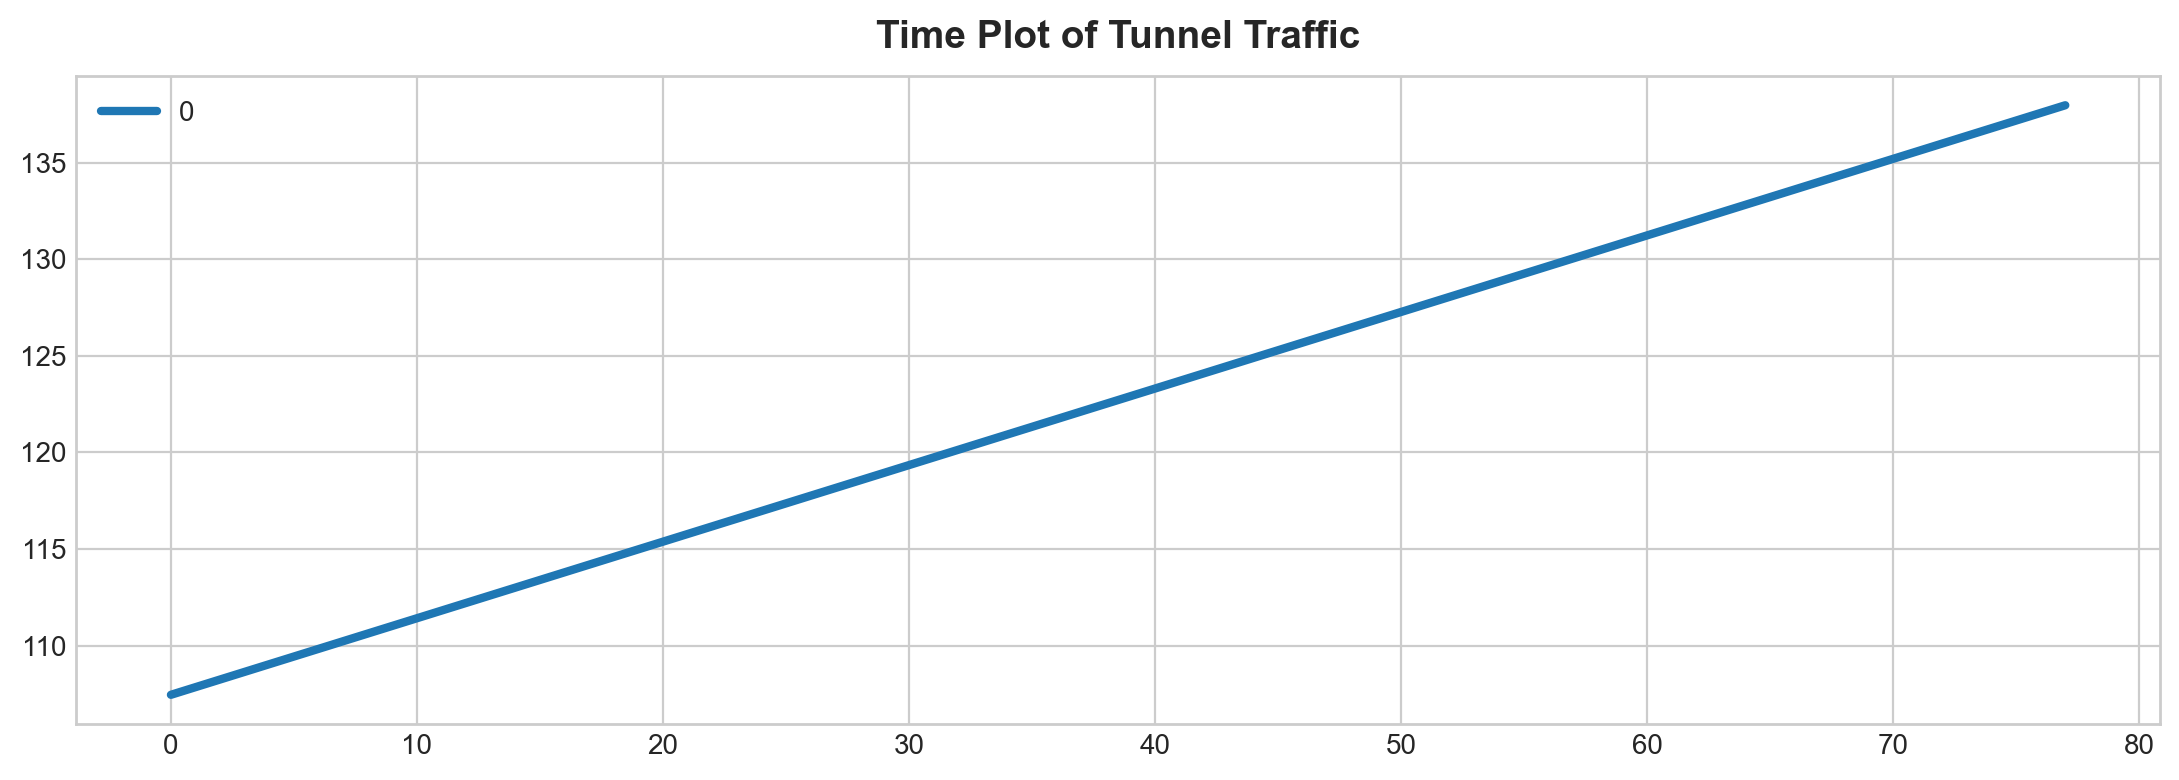

In [95]:
ax = y_test.plot(**plot_params)
ax = prediction.plot( linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

# Lag features

In [113]:
iron_prices['lag_1']= iron_prices['PIORECRUSDM'].shift(1)
iron_prices.tail()

,PIORECRUSDM,TIME,lag_1
DATE,,,
2022-04,146.666667,387,147.347826
2022-05,131.090909,388,146.666667
2022-06,131.045455,389,131.090909
2022-07,109.047619,390,131.045455
2022-08,109.065217,391,109.047619


In [133]:
# define the features and target
X= iron_prices.loc[:,'lag_1']
X.dropna(inplace=True)
y= iron_prices.loc[:, 'PIORECRUSDM']
y, X= y.align(X, join='inner')
# y, X = y.align(X, join='inner')
model= LinearRegression()

model.fit(np.array(X).reshape(-1,1),y)

LinearRegression()

In [135]:
y_pred = pd.Series(model.predict(np.array(X).reshape(-1,1)), index=X.index)

KeyError: "Cannot interpret 'Lag_1' as period"

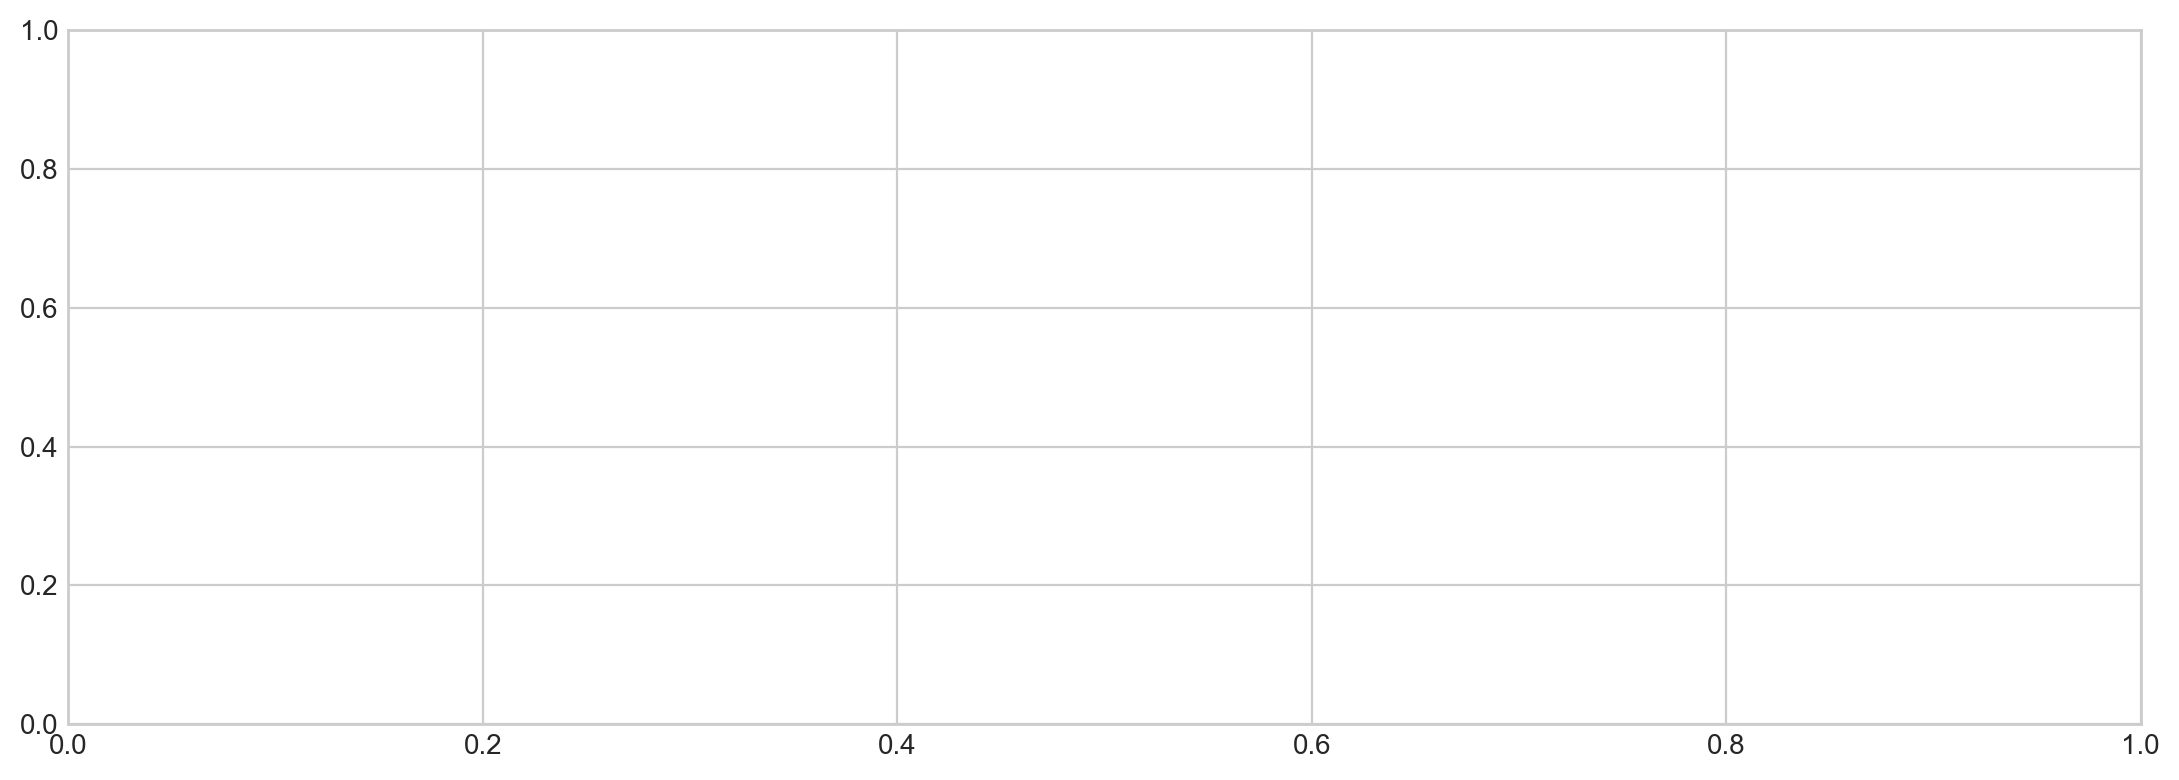

In [137]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('PIORECRUSDM')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

# Trends...

In [140]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [141]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


C:\Users\fnafisa\AppData\Local\Temp\ipykernel_33132\3099358926.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [152]:
iron_prices= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\iron ore\PIORECRUSDM.csv', parse_dates=["DATE"])
iron_prices= iron_prices.set_index('DATE').to_period()

# iron_prices = pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\iron ore\PIORECRUSDM.csv', parse_dates=["Day"])
# iron_prices = iron_prices.set_index("DATE").to_period()

In [153]:
iron_prices

,PIORECRUSDM
DATE,
1990-01,14.050000
1990-02,14.050000
1990-03,14.050000
1990-04,14.050000
1990-05,14.050000
...,...
2022-04,146.666667
2022-05,131.090909
2022-06,131.045455


## create a moving avarage window...

<AxesSubplot: title={'center': 'iron prices moving avg'}, xlabel='DATE'>

c:\Users\fnafisa\WORKSPACE\kaggle\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


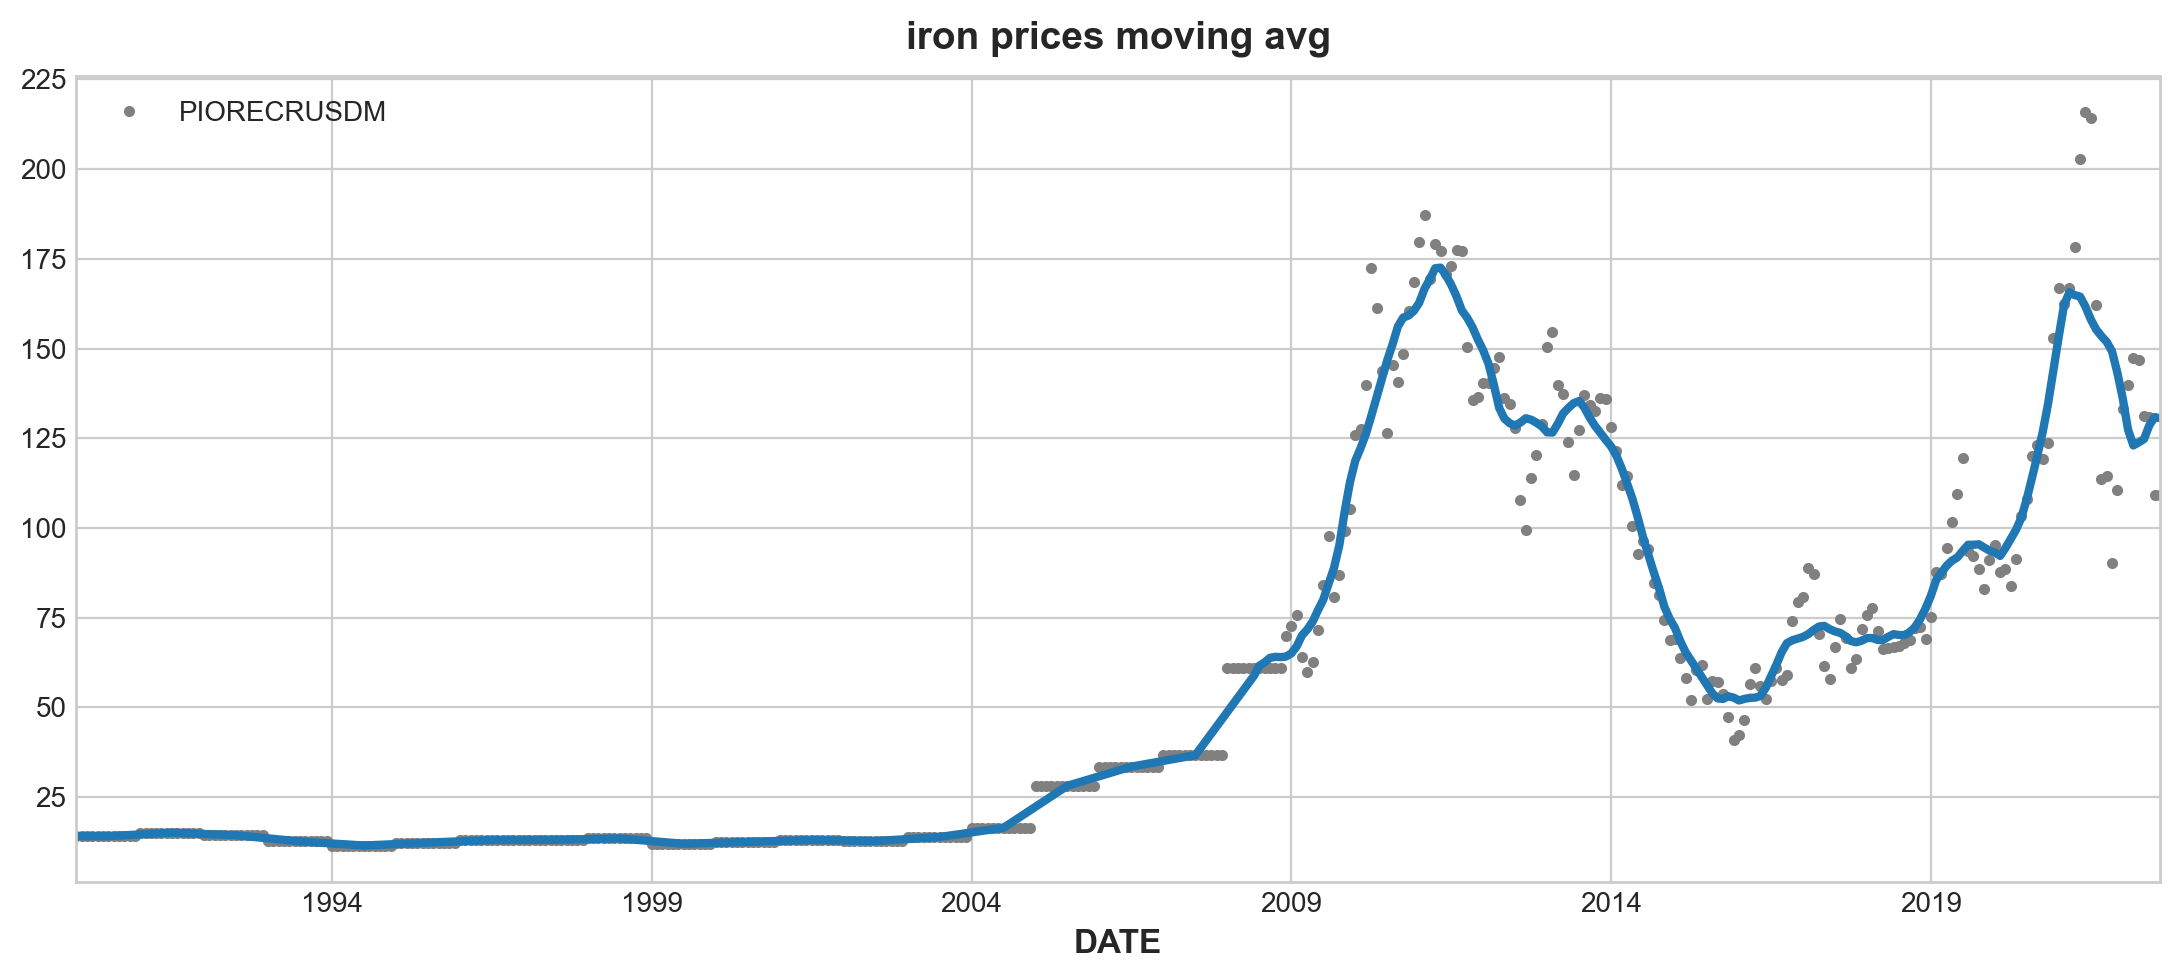

In [154]:
moving_avg= iron_prices.rolling(
    window= 12,
    center= True,
    min_periods= 6,
).mean()

ax= iron_prices.plot(style='.', color='0.5')
moving_avg.plot(
    ax= ax, linewidth= 3, title='iron prices moving avg', legend= False
)